# <FONT COLOR='red'>***Lineal Regression Exercise***</FONT>
---
---
The present notebook seek reproduce an exercise present in the [**RPubs**](https://rpubs.com/revite19/717614) page that follow the next equation to realize the predictions.

$$y = m * x + b$$

When:

*   $y$: Prediction on rely in the knowledge features.
*   $m$: Slope of the rect.
*   $x$: The knowledge features.
*   $b$: The intercept with the vertical axis (Commonly Y) when the horizotal axis is the features (Commonly X).

Then to achieved, the first step is import the necessary libraries.

In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm # Least Squares Reduction

From now on, you can find the reproduce of the dataset and the training and testing of the model

In [3]:
# CREATE DATA COLUMNS
period = np.array([i for i in range (1,11)])
investment = np.array([
    5_000,
    5_570,
    4_350,
    7_900,
    6_800,
    5_400,
    6_900,
    3_900,
    4_200,
    5_780
])
sale = np.array([
    160_000,
    189_380,
    139_200,
    260_700,
    217_600,
    183_600,
    234_600,
    136_500,
    138_600,
    202_300
])

# DATAFRAME CREATION
df = pd.DataFrame({
    'period': period,
    'investAdvers': investment,
    'sale': sale
})

# PRESENT THE DATASET
display(df)

,period,investAdvers,sale
0,1,5000,160000
1,2,5570,189380
2,3,4350,139200
3,4,7900,260700
4,5,6800,217600
5,6,5400,183600
6,7,6900,234600
7,8,3900,136500
8,9,4200,138600
9,10,5780,202300


For clarity, X=investAdvers and Y=sales are taken to reproduce the linear regresion.

It is important to note that to reproduce linear regression it is necessary to obtain two specific results, the slope and the intercept to generate the line.

---
$$Slope = m = \frac{n * \sum_{i=1}^{n}{x_{i} y_{i}} - \sum_{i=1}^{n}{x_i} * \sum_{i_0}^{n}{y_i}}{n * \sum_{i=1}^{n}{x_{i}^{2}} - (\sum_{i=1}^{n}{x_{i}})^{2}}$$

---

$$Intercept = b = \frac{\sum_{i=1}^{n}{y_{i}} * \sum_{i=1}^{n}{x_{i}^{2}} - \sum_{i=1}^{n}{x_{i}} * \sum_{i=1}^{n}{x_{i} y_{i}}}{n * \sum_{i=1}^{n}{x_{i}^{2}} - (\sum_{i=1}^{n}{x_{i}})^{2}}$$


$$b = \frac{\sum_{i=1}^{n}{y_{i}}}{n} - m * \frac{\sum_{i=1}^{n}{x_{i}}}{n}$$

---


In [4]:
# SELECT THE FEATURES X
x = np.array(df['investAdvers'])

# SELECT THE TARGETS Y
y = np.array(df['sale'])

# CALCULATE NECESSARY VARIABLES
sum_x = x.sum()
sum_y = y.sum()
sum_xy = (x * y).sum()
sum_x2 = (np.power(x,2)).sum()
n = len(x)

# CALCULATE SLOPE
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - np.power(sum_x,2))

# CALCULATE INTERCEPT
b = sum_y/n - m * sum_x/n

# OBTAIN PREDICTIONS
y_pred = m * x + b

# PRESENT THE SLOPE AND INTERCEPT
print(f'Slope (m): {m:.4f}')
print(f'Intercept (b): {b:.4f}')

Slope (m): 32.8193
Intercept (b): 3116.0840


In [5]:
def lr_figure(data, prediction):
  # CREATE THE FIGURE
  plt.figure(figsize=(10,6))

  # REAL DATA
  plt.scatter(data['investAdvers'], data['sale'], label='Real Data', color='blue', linewidth=2)

  # LINEAR REGRESION
  plt.plot(data['investAdvers'], prediction, label='Linear Regression Prediction', color='red', linewidth=2)

  # ERROR
  plt.plot([data['investAdvers'], data['investAdvers']], [data['sale'], prediction], color='green', linestyle='--', linewidth=2)

  # TAGS
  plt.xlabel('Investment in advertising (X)')
  plt.ylabel('Sales (Y)')
  plt.title('Linear Regression')
  plt.legend()

  # GRID
  plt.minorticks_on()
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

  # REMOVE TOP AND LEFT BORDER
  sns.despine()

  # SHOW THE FIGURE
  plt.show()

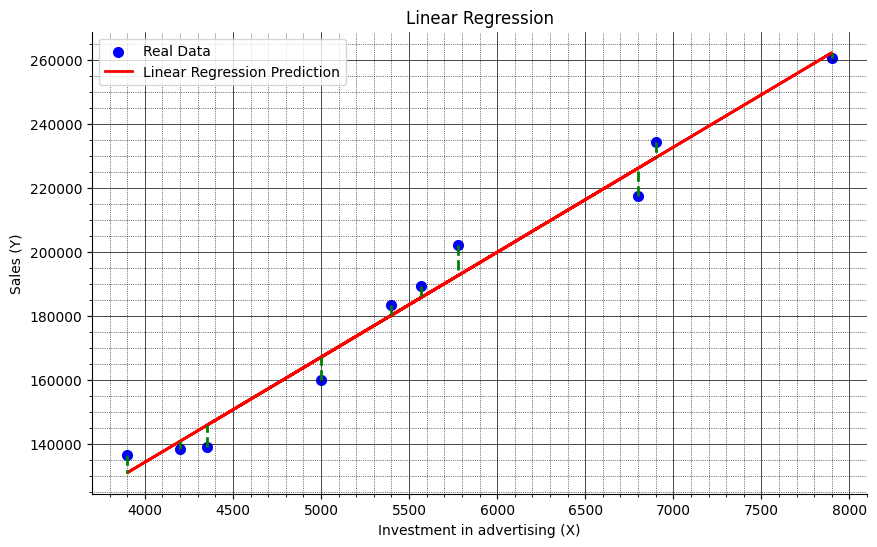

In [6]:
# GENERATE THE LINEAR REGRESION FIGURE
lr_figure(df, y_pred)

So now if we want to review the investments from the eleventh period onwards, we can predict them taking into account the data regression that was performed.

In [7]:
investAdverst = 8_000
sale_predict = m * investAdverst + b
print(f'The sales predicted are {sale_predict:.4f}')

The sales predicted are 265670.8023


Another way to check it is through a residual graph to identify how precise the prediction model is, so that we seek to make the residuals as small as possible.

In [8]:
# CALCULATE RESIDUALS
y_pred = m * x + b
residual = y - y_pred
zeros = np.zeros(len(residual))

In [9]:
def lr_residual_figure (prediction, residuals):
  zeros = np.zeros(len(residuals))

  # CREATE RESIDUALS FIGURE
  plt.figure(figsize=(10,6))

  # RESIDUALS
  plt.scatter(prediction, residuals, color='blue', linewidths=2)

  # REFERENCE LINE
  plt.axhline(y=0, color='red')

  # RESIDUAL DISTANCE TO REFERENCE LINE
  plt.plot([prediction, prediction], [zeros, residuals], color='green', linestyle='--', linewidth=2)

  # TAGS
  plt.xlabel('Model Predictions')
  plt.ylabel('Residuals')
  plt.title('Residuals Plot')

  # GRID
  plt.minorticks_on()
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

  # REMOVE THE TOP AND LEFT BORDES
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  # DISPLAY FIGURE
  plt.show()

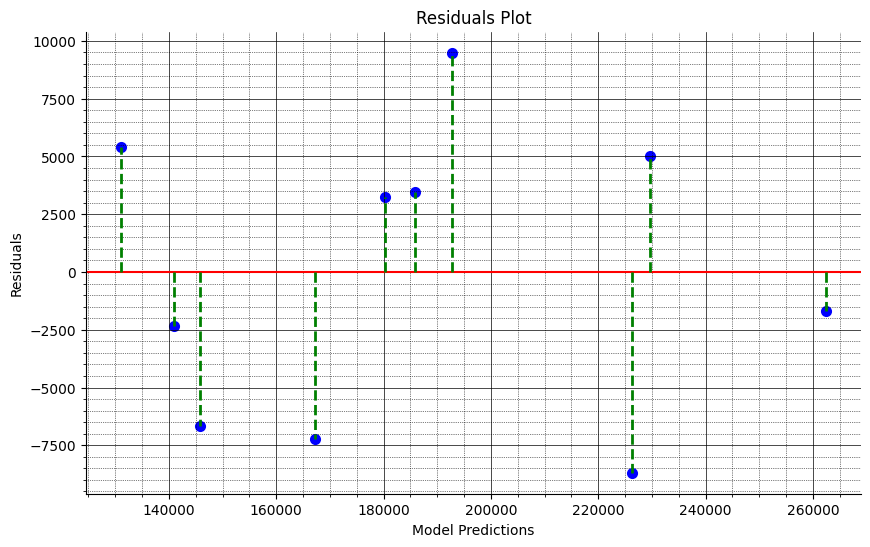

In [10]:
# GENERATE THE RESIDUALS FIGURE
lr_residual_figure(y_pred, residual)

Other way to create a linear regression model to realize predictions is using the sklearn library

In [11]:
# IDENTIFY THE FEATURE AND THE LABEL
X = df[['investAdvers']]
y = df['sale']

# CREATE THE MODEL
model = LinearRegression()

# TRAIN THE MODEL
model.fit(X, y)

# OBTAIN PREDICTIONS
y_pred = model.predict(X)

# PRESENT THE SLOPE, INTERCEPT AND R-SQUARED METRIC
print(f'Slope (m): {model.coef_[0]:.4f}')
print(f'Intercept (b): {model.intercept_:.4f}')
print(f'R-Squared: {model.score(X, y):.4f}')

Slope (m): 32.8193
Intercept (b): 3116.0840
R-Squared: 0.9793


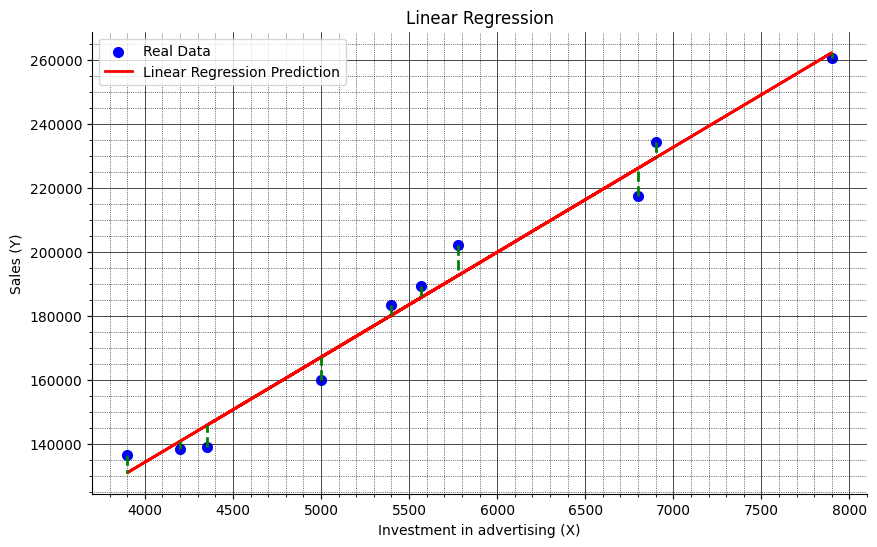

In [12]:
# GENERATE LINEAR REGRESSION FIGURE
lr_figure(df, y_pred)

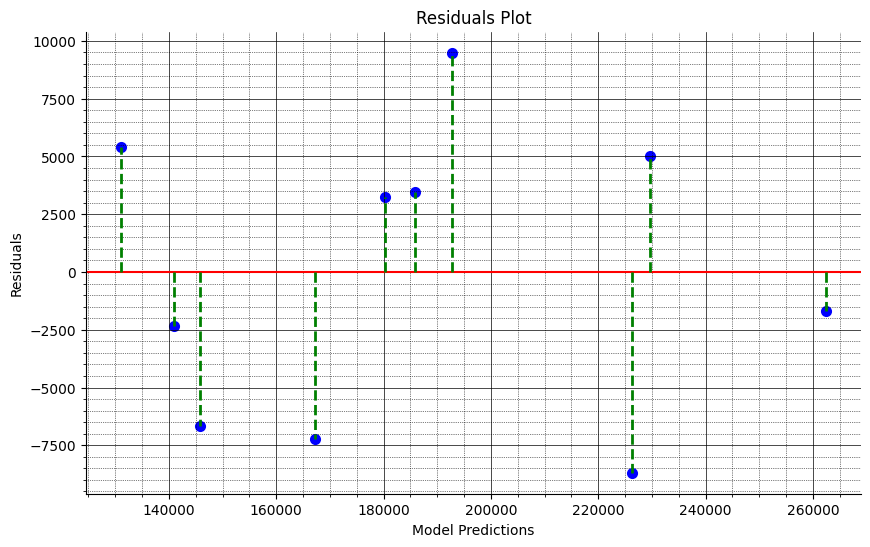

In [13]:
# GENERATE RESIDUALS FIGURE
lr_residual_figure(y_pred, residual)

Finally, an example where the other method called least squares reduction (OLS algorithm) is used is found in [**RPubs**](https://rpubs.com/revite19/717614)

In [14]:
# CREATE THE DATA COLUMS
hours = np.array([
  10,
  15,
  18,
  20,
  24,
  30,
  35,
  40,
  45,
  48
])
pay = np.array([
  500,
  800,
  850,
  950,
  1100,
  1300,
  1550,
  1700,
  1900,
  2100
])

# CREATE DATAFRAME
hour_df = pd.DataFrame({
    'X (hours)': hours,
    'Y (new soles)': pay
})

# DISPLAY DATASET
display(hour_df)

,X (hours),Y (new soles)
0,10,500
1,15,800
2,18,850
3,20,950
4,24,1100
5,30,1300
6,35,1550
7,40,1700
8,45,1900
9,48,2100


In [17]:
# IDENTIFY FERATURE AND LABEL
X = sm.add_constant(hour_df[['X (hours)']])
y = hour_df['Y (new soles)']

# CREATE MODEL
model = sm.OLS(y, X)

# TRAIN MODEL
regressor = model.fit()

# DISPLAY MODEL SUMMARY
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:          Y (new soles)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1703.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.31e-10
Time:                        21:43:25   Log-Likelihood:                -49.451
No. Observations:                  10   AIC:                             102.9
Df Residuals:                       8   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.0495     29.969      4.740      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [19]:
# OBTAIN PREDICTIONS
y_pred_ols = regressor.predict(X)

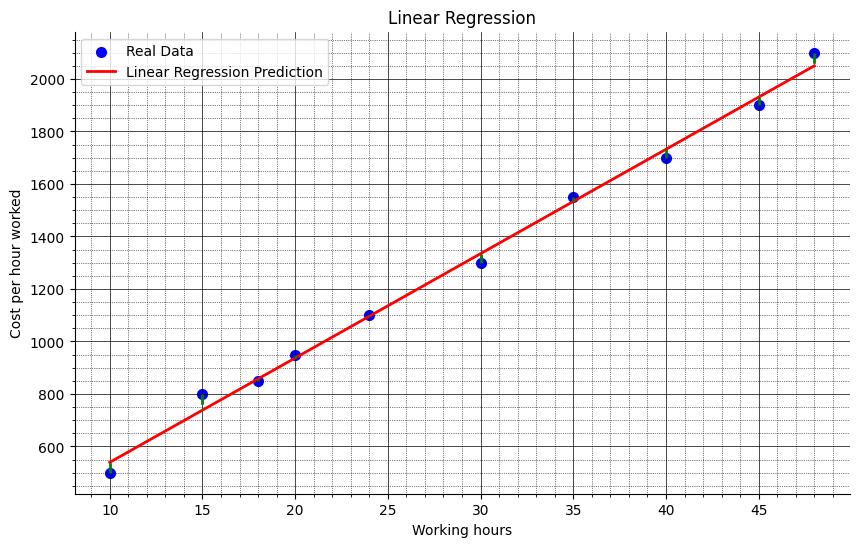

In [20]:
# CREATE THE FIGURE
plt.figure(figsize=(10,6))

# REAL DATA
plt.scatter(hour_df['X (hours)'], hour_df['Y (new soles)'], label='Real Data', color='blue', linewidth=2)

# LINEAR REGRESION
plt.plot(hour_df['X (hours)'], y_pred_ols, label='Linear Regression Prediction', color='red', linewidth=2)

# ERROR
plt.plot([hour_df['X (hours)'], hour_df['X (hours)']], [hour_df['Y (new soles)'], y_pred_ols], color='green', linestyle='--', linewidth=2)

# TAGS
plt.xlabel('Working hours')
plt.ylabel('Cost per hour worked')
plt.title('Linear Regression')
plt.legend()

# GRID
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# REMOVE TOP AND LEFT BORDER
sns.despine()

# SHOW THE FIGURE
plt.show()

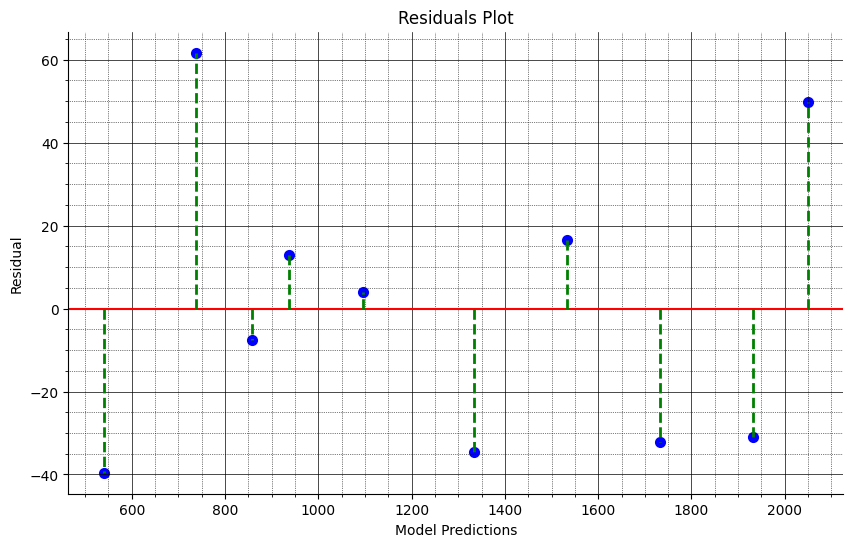

In [21]:
# CALCULATE RESIDUALS
residual_ols = y - y_pred_ols
zeros = np.zeros(len(residual_ols))

# CREATE RESIDUALS FIGURE
plt.figure(figsize=(10,6))

# RESIDUALS
plt.scatter(y_pred_ols, residual_ols, color='blue', linewidths=2)

# REFERENCE LINE
plt.axhline(y=0, color='red')

# RESIDUAL DISTANCE TO REFERENCE LINE
plt.plot([y_pred_ols, y_pred_ols], [zeros, residual_ols], color='green', linestyle='--', linewidth=2)

# TAGS
plt.xlabel('Model Predictions')
plt.ylabel('Residual')
plt.title('Residuals Plot')

# GRID
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# REMOVE THE TOP AND LEFT BORDES
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# DISPLAY FIGURE
plt.show()